In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
n_samples, h, w = lfw_people.images.shape

In [4]:
h

50

In [5]:
w

37

In [6]:
n_samples

1288

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

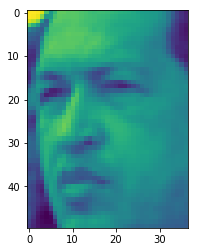

In [10]:
plt.imshow(lfw_people.images[0])

In [11]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [12]:
lfw_people.target[0]

5

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target)

In [15]:
50*37

1850

In [16]:
n_components = 150

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=n_components).fit(X_train)

In [20]:
pca

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


### SVM for classification

In [22]:
from sklearn import svm

In [35]:
clf = svm.SVC(kernel='poly')


In [36]:
clf = clf.fit(X_train_pca, y_train)

In [37]:
clf.score(X_test_pca, y_test)

0.69254658385093171

In [27]:
X_train_pca.shape

(966, 150)

In [34]:
help(svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly